In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-nonlinear2d-mems)

All we need to define are $\phi$ from {eq}`nonlinpdepde` for the PDE, and a trivial zero function for the boundary condition.

In [2]:
λ = 1.5
ϕ = (X, Y, U, Ux, Uxx, Uy, Uyy) -> @. Uxx + Uyy - λ / (U + 1)^2;
g = (x, y) -> 0;

Here is the solution for $m=15$, $n=8$.

In [3]:
u = FNC.elliptic(ϕ, g, 15, [0, 2.5], 8, [0, 1]);

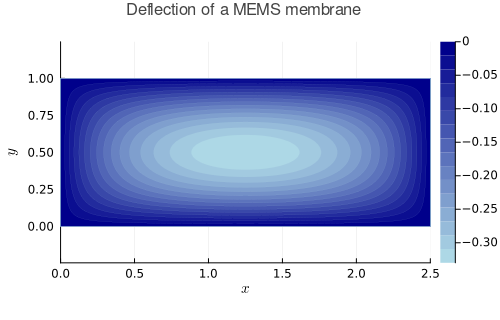

In [4]:
x = range(0, 2.5, 100)
y = range(0, 1, 50)
U = [u(x, y) for x in x, y in y]
contourf(x, y, U';
    color=:blues,  l=0,
    aspect_ratio=1,
    xlabel=L"x",  ylabel=L"y",  zlabel=L"u(x,y)",
    title="Deflection of a MEMS membrane",
    right_margin=3Plots.mm)

In the absence of an exact solution, how can we be confident that the solution is accurate? First, the Levenberg iteration converged without issuing a warning, so we should feel confident that the discrete equations were solved. We can check the boundary values easily. For example,

In [5]:
x_test = range(0, 2.5, 100)
norm([u(x, 0) - g(x, 0) for x in x_test], Inf)

2.4918568873705487e-23

Assuming that we encoded the PDE correctly, the remaining source error is truncation from the discretization. We can estimate that by refining the grid a bit and seeing how much the numerical solution changes.

In [6]:
x_test = range(0, 2.5, 6)
y_test = range(0, 1, 6)
mtx_test, _ = FNC.tensorgrid(x_test, y_test)
mtx_test(u)

6×6 Matrix{Float64}:
  0.0           2.38731e-25  -4.92724e-24  …   7.74378e-25   0.0
  2.91976e-24  -0.147964     -0.226459        -0.147964     -4.94098e-25
 -9.59403e-24  -0.195861     -0.305949        -0.195861      1.55867e-24
 -1.77355e-23  -0.195861     -0.305949        -0.195861      1.30691e-23
 -8.41765e-25  -0.147964     -0.226459        -0.147964     -4.47272e-24
  0.0           2.5961e-24   -1.38235e-24  …   4.40206e-24   0.0

In [7]:
u = FNC.elliptic(ϕ, g, 25, [0, 2.5], 14, [0, 1]);
mtx_test(u)

6×6 Matrix{Float64}:
  0.0          -2.32202e-22   3.64848e-23  …  -7.02464e-24   0.0
 -9.25622e-23  -0.147958     -0.226453        -0.147958     -1.59215e-22
 -1.02101e-22  -0.195861     -0.305929        -0.195861     -1.96135e-22
 -1.47369e-21  -0.195861     -0.305929        -0.195861     -4.03143e-22
 -1.46345e-22  -0.147958     -0.226453        -0.147958      1.00683e-22
  0.0          -4.08671e-23   3.06048e-22  …  -4.38852e-23   0.0

The original solution seems to be accurate to about four digits.